In [48]:
from qiskit import *
from qiskit.visualization import plot_histogram
from qiskit_aer import Aer

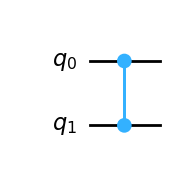

In [49]:
oracle = QuantumCircuit(2, name='Oracle')
oracle.cz(0, 1)
oracle_gate = oracle.to_gate()
oracle.draw('mpl')

In [50]:
circuit = QuantumCircuit(2, 2)
circuit.h(range(2))

In [51]:
circuit.barrier()
circuit.append(oracle_gate, range(2))

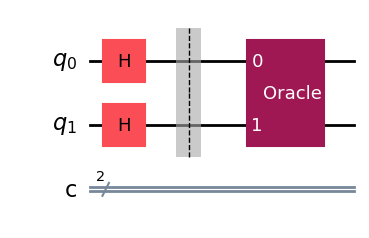

In [52]:
circuit.draw('mpl')

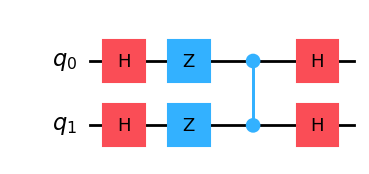

In [53]:
reflector = QuantumCircuit(2, name='Reflector')
reflector.h(range(2))
reflector.z(range(2))
reflector.cz(0, 1)
reflector.h(range(2))
reflector_gate = reflector.to_gate()
reflector.draw('mpl')

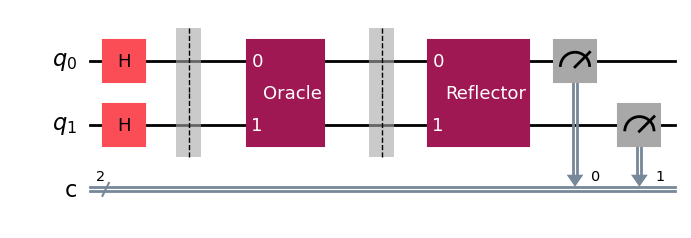

In [54]:
circuit.barrier()
circuit.append(reflector_gate, range(2))
circuit.measure(range(2), range(2))
circuit.draw('mpl')

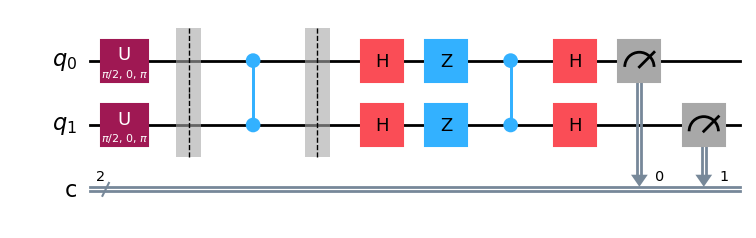

In [55]:
circuit = circuit.decompose()
circuit.draw('mpl')

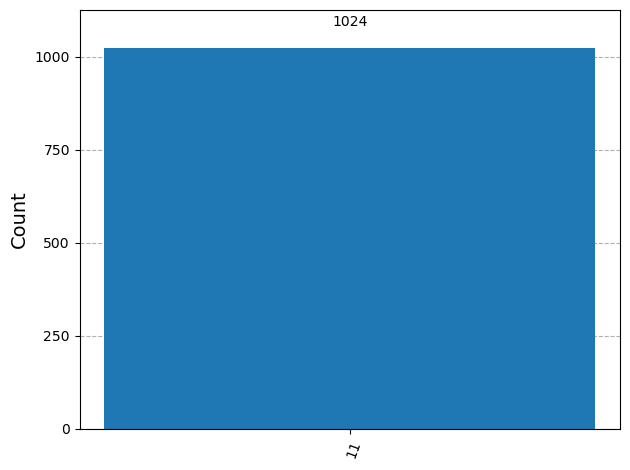

In [56]:
backend = Aer.get_backend('qasm_simulator')
result = backend.run(circuit, shots=1024).result()
counts = result.get_counts(circuit)
plot_histogram(counts)